# Clustering Problem

**12210357 徐婧珺**

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, adjusted_rand_score
import matplotlib.pyplot as plt
from utilities import labels_optimal_mapping
import kmeans as km
import soft_kmeans as skm
import pca

import importlib

importlib.reload(km)
importlib.reload(skm)
importlib.reload(pca)

def plot_graph_with_labels(features, labels, pred_labels, centroids, title):
    combined_matrix = np.vstack((features, centroids))
    PCAmodel = pca.PCA(2)
    PCAmodel.fit(combined_matrix)
    X_centered = PCAmodel.transform(combined_matrix)
    new_features = X_centered[:-3]

        # 设置绘图
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'orange']

    # 绘制所有的数据点
    for i in range(1,4):
        # 正确分类的数据点
        plt.scatter(new_features[(pred_labels == i) & (pred_labels == labels), 0], 
                    new_features[(pred_labels == i) & (pred_labels == labels), 1], 
                    c=colors[i-1], label=f'Cluster {i}', edgecolors='k', marker='o')

        # 错误分类的数据点，用红色圈出
        plt.scatter(new_features[(pred_labels == i) & (pred_labels != labels), 0], 
                    new_features[(pred_labels == i) & (pred_labels != labels), 1], 
                    c=colors[i-1], edgecolors='red', marker='o', linewidth=2)

    # 绘制聚类中心
    plt.scatter(X_centered[-3:, 0], X_centered[-3:, 1], label='Cluster centroid', marker='x', s=200, c='black')

    # 添加图例和其他图形属性
    plt.legend()
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # 显示图形
    plt.show()

# 读取数据
data = np.loadtxt('seeds_dataset.txt')
features = data[:, :-1]
labels = data[:, -1]
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

## Normal Kmeans & SoftKmeans

Set class_num = 3 : 

Kmeans Accuracy_score: 0.8904761904761904
Kmeans Adjusted_rand_score: 0.7103417092680225


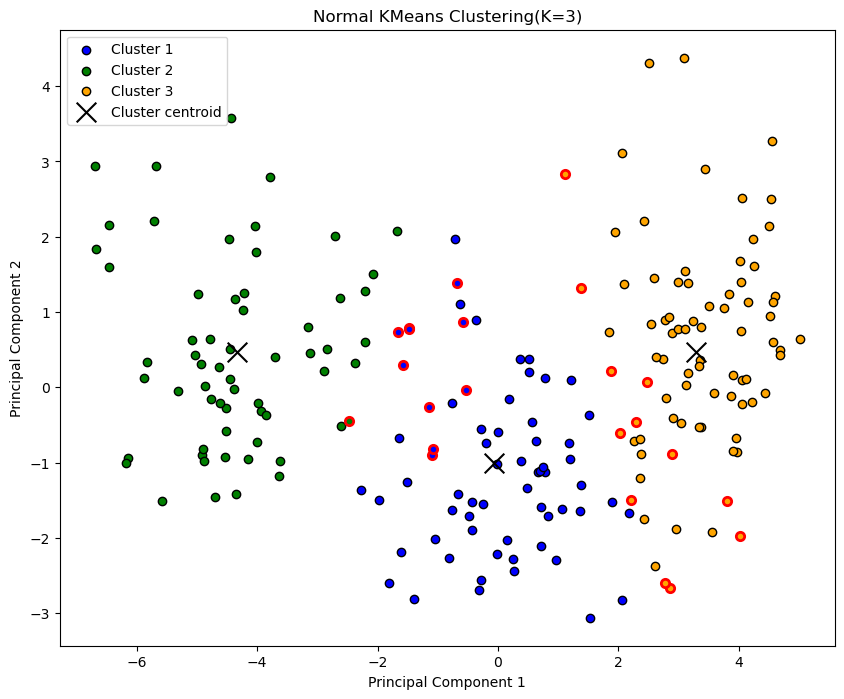

In [7]:
# 设定模型参数
class_num = 3
max_iter = 10000
tol = None
random_state = 100
init_type = 1
# 模型训练
kmeans = km.KMeans(class_num, max_iter, tol, random_state)
kmeans.fit(features, init_type)
pred = kmeans.predict(features)
true_pred = labels_optimal_mapping(pred, labels)
centroids = kmeans.return_centroids()
print(f'Kmeans Accuracy_score: {accuracy_score(true_pred, labels)}')
print(f'Kmeans Adjusted_rand_score: {adjusted_rand_score(pred, labels)}')
plot_graph_with_labels(features, labels, true_pred, centroids, 'Normal KMeans Clustering(K=3)')

Soft Kmeans Accuracy_score: 0.9095238095238095
Soft Kmeans Adjusted_rand_score: 0.7519238371683716


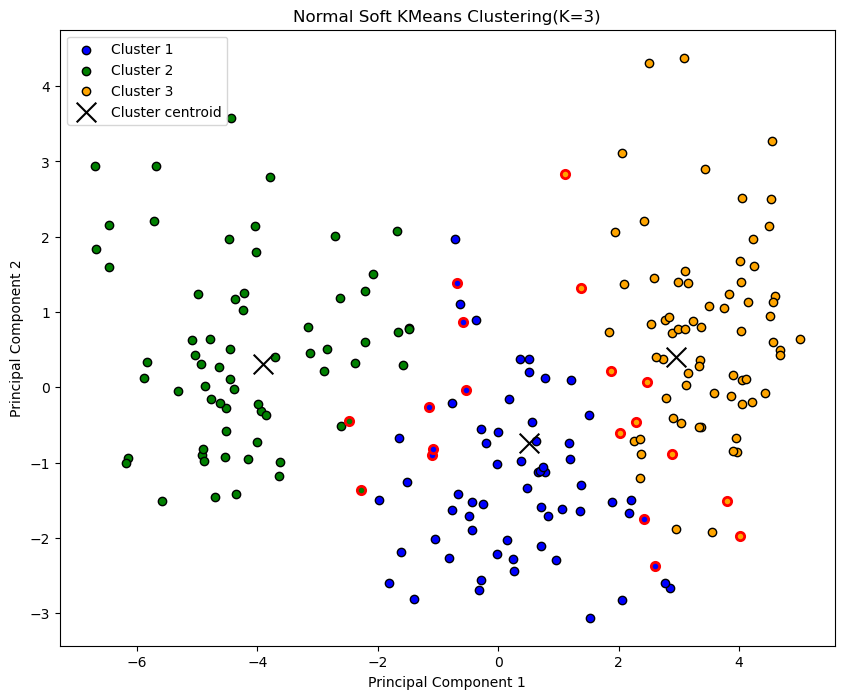

In [8]:
# 设定模型参数
class_num = 3
max_iter = 10000
tol = None
random_state = 100
init_type = 1
beta = 0.86
# 模型训练
soft_kmeans = skm.SoftKMeans(class_num, max_iter, beta, tol, random_state)
soft_kmeans.fit(features, init_type)
soft_pred = soft_kmeans.predict(features)
true_soft_pred = labels_optimal_mapping(soft_pred, labels)
soft_centroids = soft_kmeans.return_centroids()
print(f'Soft Kmeans Accuracy_score: {accuracy_score(true_soft_pred, labels)}')
print(f'Soft Kmeans Adjusted_rand_score: {adjusted_rand_score(soft_pred, labels)}')
plot_graph_with_labels(features, labels, true_soft_pred, soft_centroids, 'Normal Soft KMeans Clustering(K=3)')

Set the class_num = 10 :

In [9]:
from sklearn.metrics import silhouette_score

def plot_graph(features, pred_labels, centroids, title):
    clusters_num = len(centroids)
    combined_matrix = np.vstack((features, centroids))
    PCAmodel = pca.PCA(2)
    PCAmodel.fit(combined_matrix)
    X_centered = PCAmodel.transform(combined_matrix)
    new_features = X_centered[:-clusters_num]

    # 设置绘图
    plt.figure(figsize=(10, 8))
    # 绘制每个点
    plt.scatter(new_features[:, 0], new_features[:, 1], c=pred_labels, s=50, cmap='viridis')
    # 绘制聚类中心
    plt.scatter(X_centered[-clusters_num:, 0], X_centered[-clusters_num:, 1], label='Cluster centroid', marker='x', s=200, c='black')

    # 添加图例和其他图形属性
    plt.legend()
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # 显示图形
    plt.show()

Kmeans silhouette_score: 0.3602584019259774


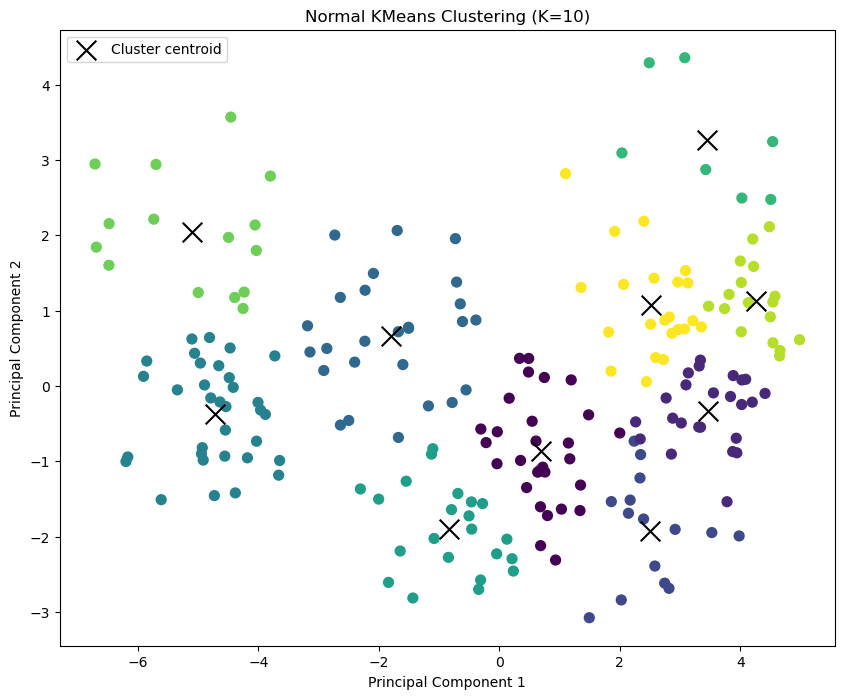

In [10]:
# 设定模型参数
class_num = 10
max_iter = 10000
tol = None
random_state = 100
init_type = 1
# 模型训练
kmeans = km.KMeans(class_num, max_iter, tol, random_state)
kmeans.fit(features, init_type)
pred = kmeans.predict(features)
centroids = kmeans.return_centroids()
print(f'Kmeans silhouette_score: {silhouette_score(features, pred)}')
plot_graph(features, pred, centroids, 'Normal KMeans Clustering (K=10)')

Soft Kmeans silhouette_score: 0.36726164497730057


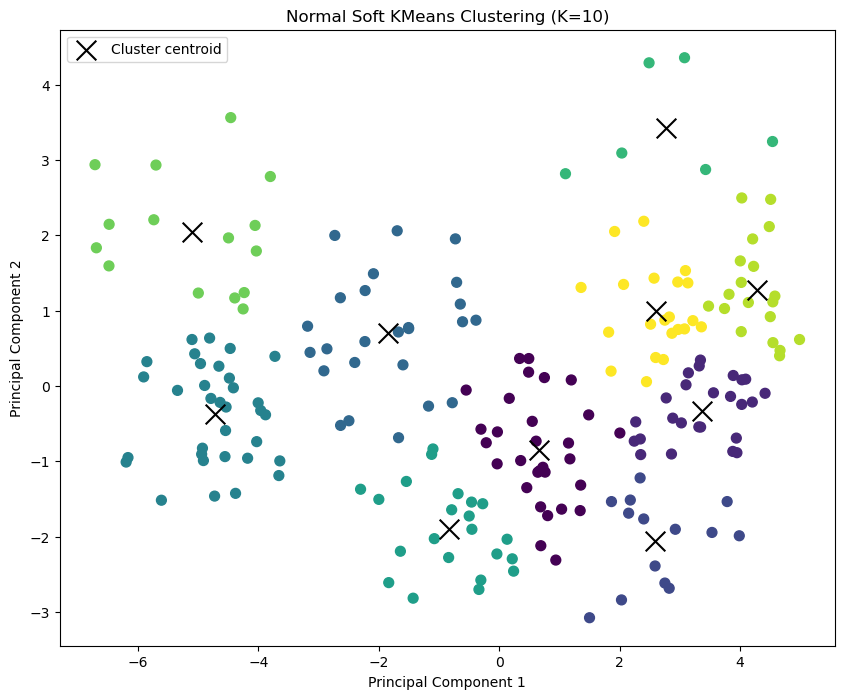

In [11]:
# 设定模型参数
class_num = 10
max_iter = 10000
tol = None
random_state = 100
init_type = 1
beta = 20
# 模型训练
soft_kmeans = skm.SoftKMeans(class_num, max_iter, beta, tol, random_state)
soft_kmeans.fit(features, init_type)
soft_pred = soft_kmeans.predict(features)
soft_centroids = soft_kmeans.return_centroids()
print(f'Soft Kmeans silhouette_score: {silhouette_score(features, soft_pred)}')
plot_graph(features, soft_pred, soft_centroids, 'Normal Soft KMeans Clustering (K=10)')

## Add non-local split-and-merge moves

In [12]:
import adjusted_kmeans as akm
import adjusted_soft_kmeans as askm
import importlib

importlib.reload(akm)
importlib.reload(askm)

<module 'adjusted_soft_kmeans' from '/mnt/e/桌面/专业学习/SIM207/final_project/code/adjusted_soft_kmeans.py'>

Adjusted Kmeans silhouette_score: 0.3609374302180081


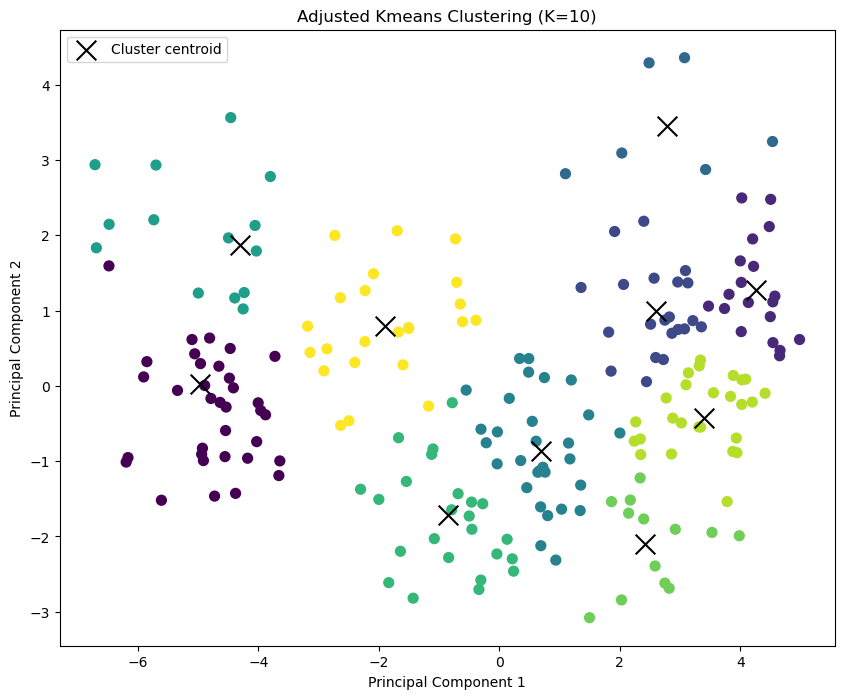

In [13]:
# 设定模型参数
class_num = 10
max_iter1 = 10000
max_iter2 = 20
tol = None
random_state = 100
init_type = 1
# 模型训练
kmeans_sm = akm.KMeansSplitMerge(class_num, max_iter1, max_iter2, tol, random_state)
kmeans_sm.fit(features, init_type, None)
sm_pred = kmeans_sm.predict(features)
sm_centroids = kmeans_sm.return_centroids()
print(f'Adjusted Kmeans silhouette_score: {silhouette_score(features, sm_pred)}')
plot_graph(features, sm_pred, sm_centroids, 'Adjusted Kmeans Clustering (K=10)')

Adjusted Kmeans silhouette_score: 0.3520221170150738


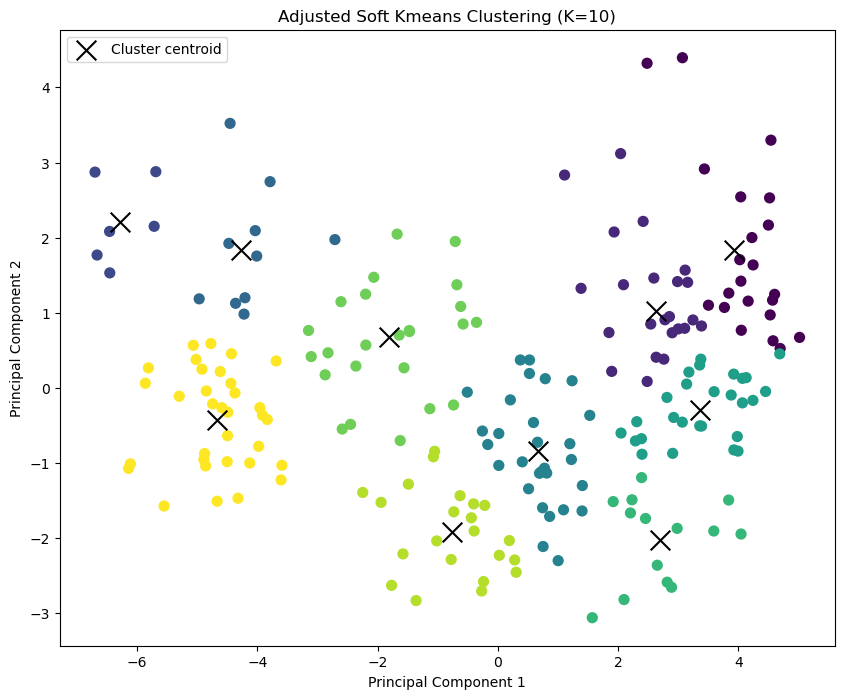

In [14]:
# 设定模型参数
class_num = 10
max_iter1 = 10000
max_iter2 = 4
tol = None
random_state = 100
init_type = 1
beta = 20
# 模型训练
soft_kmeans_sm = askm.SoftKMeansSplitMerge(class_num, max_iter1, max_iter2, beta, tol, random_state)
soft_kmeans_sm.fit(features, init_type, None)
soft_sm_pred = soft_kmeans_sm.predict(features)
soft_sm_centroids = soft_kmeans_sm.return_centroids()
print(f'Adjusted Kmeans silhouette_score: {silhouette_score(features, soft_sm_pred)}')
plot_graph(features, soft_sm_pred, soft_sm_centroids, 'Adjusted Soft Kmeans Clustering (K=10)')

## Different Initialization methods

随机初始化

Kmeans Accuracy_score: 0.8904761904761904
Kmeans Adjusted_rand_score: 0.7103417092680225


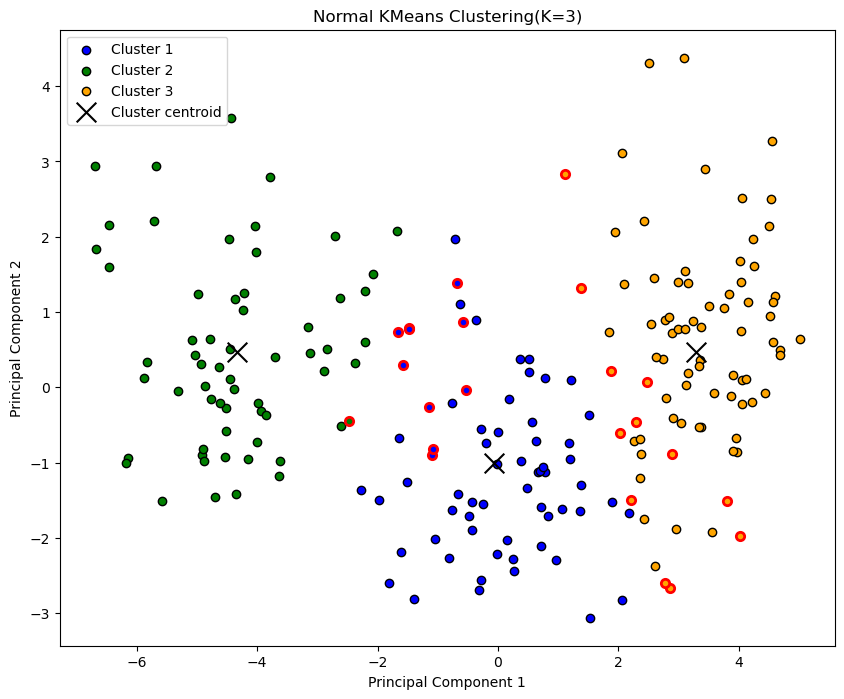

In [15]:
# 20 (0.8904761904761904, 0.7103417092680225) (0.8952380952380953, 0.7166198557361053) (0.8952380952380953, 0.7166198557361053) 
# 666 (0.8904761904761904, 0.7103417092680225) (0.8904761904761904, 0.7103417092680225) (0.8952380952380953, 0.7166198557361053)
# 2023 (0.8952380952380953, 0.7166198557361053) (0.8952380952380953, 0.7210818929885511) (0.8952380952380953, 0.7166198557361053)
# 20040918 (0.8904761904761904, 0.7103417092680225) (0.8952380952380953, 0.7166198557361053) (0.8952380952380953, 0.7166198557361053)
# 20041128 (0.8952380952380953, 0.7166198557361053) (0.8952380952380953, 0.7166198557361053) (0.8952380952380953, 0.7166198557361053)
# 设定模型参数
class_num = 3
max_iter = 100
tol = None
random_state = 666
init_type = 1
# 模型训练
kmeans = km.KMeans(class_num, max_iter, tol, random_state)
kmeans.fit(features, init_type)
pred = kmeans.predict(features)
true_pred = labels_optimal_mapping(pred, labels)
centroids = kmeans.return_centroids()
print(f'Kmeans Accuracy_score: {accuracy_score(true_pred, labels)}')
print(f'Kmeans Adjusted_rand_score: {adjusted_rand_score(pred, labels)}')
plot_graph_with_labels(features, labels, true_pred, centroids, 'Normal KMeans Clustering(K=3)')


Kmeans++ 初始化

Kmeans Accuracy_score: 0.8904761904761904
Kmeans Adjusted_rand_score: 0.7103417092680225


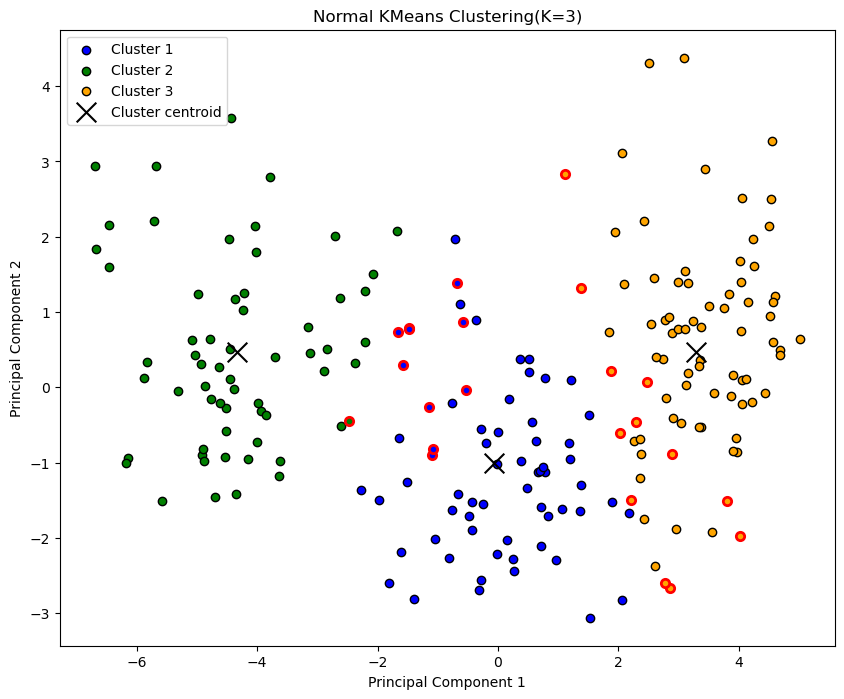

In [16]:
# 设定模型参数
class_num = 3
max_iter = 100
tol = None
random_state = 666
init_type = 2
# 模型训练
kmeans = km.KMeans(class_num, max_iter, tol, random_state)
kmeans.fit(features, init_type)
pred = kmeans.predict(features)
true_pred = labels_optimal_mapping(pred, labels)
centroids = kmeans.return_centroids()
print(f'Kmeans Accuracy_score: {accuracy_score(true_pred, labels)}')
print(f'Kmeans Adjusted_rand_score: {adjusted_rand_score(pred, labels)}')
plot_graph_with_labels(features, labels, true_pred, centroids, 'Normal KMeans Clustering(K=3)')


最远点初始化

Kmeans Accuracy_score: 0.8952380952380953
Kmeans Adjusted_rand_score: 0.7166198557361053


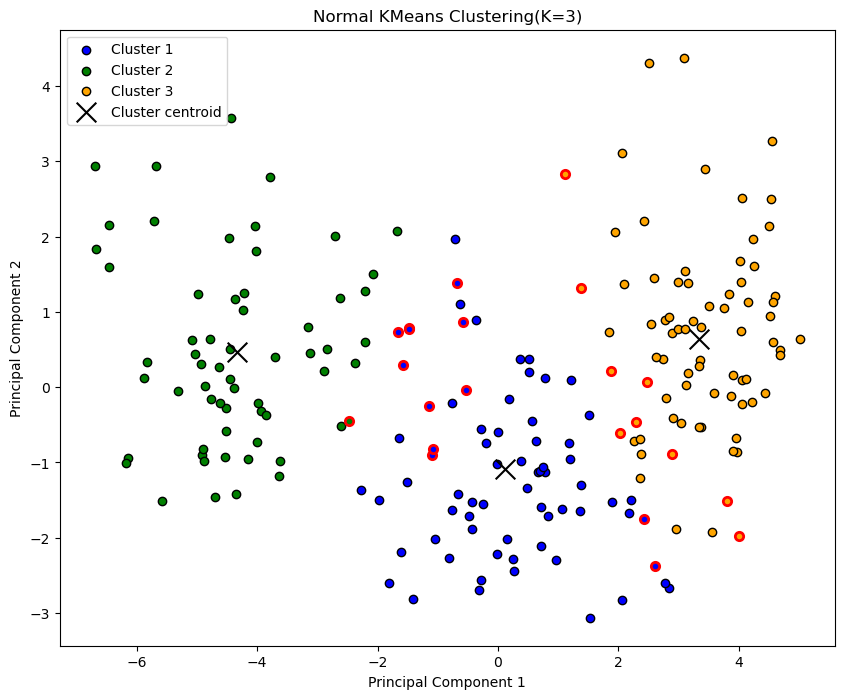

In [17]:
# 设定模型参数
class_num = 3
max_iter = 100
tol = None
random_state = 666
init_type = 3
# 模型训练
kmeans = km.KMeans(class_num, max_iter, tol, random_state)
kmeans.fit(features, init_type)
pred = kmeans.predict(features)
true_pred = labels_optimal_mapping(pred, labels)
centroids = kmeans.return_centroids()
print(f'Kmeans Accuracy_score: {accuracy_score(true_pred, labels)}')
print(f'Kmeans Adjusted_rand_score: {adjusted_rand_score(pred, labels)}')
plot_graph_with_labels(features, labels, true_pred, centroids, 'Normal KMeans Clustering(K=3)')